# Wine quality

In [1]:
# -*- coding: utf-8 -*-

import pandas as pd
import numpy as np

# visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
# split data
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

# preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# regressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# evalutation metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error

In [3]:
df = pd.read_csv('../data/winequality.csv',sep=';')

## Investigating the dataset

First few lines

In [4]:
df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,White,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,White,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,White,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,White,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,White,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


Some information about the data

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
type                    6497 non-null object
fixed acidity           6497 non-null float64
volatile acidity        6497 non-null float64
citric acid             6497 non-null float64
residual sugar          6497 non-null float64
chlorides               6497 non-null float64
free sulfur dioxide     6497 non-null float64
total sulfur dioxide    6497 non-null float64
density                 6497 non-null float64
pH                      6497 non-null float64
sulphates               6497 non-null float64
alcohol                 6497 non-null object
quality                 6497 non-null int64
dtypes: float64(10), int64(1), object(2)
memory usage: 659.9+ KB


The column alcohol shouldn't have type object, let's select elements that can not be transformed directly to float

In [6]:
def isfloat(value):
    try:
        float(value)
        return True
    except ValueError:
        return False

In [7]:
df[df.alcohol.apply(lambda x:not isfloat(x))].groupby('alcohol').count().quality

alcohol
100.333.333.333.333    3
101.333.333.333.333    2
104.666.666.666.667    2
105.333.333.333.333    1
105.666.666.666.667    1
109.333.333.333.333    2
109.666.666.666.667    3
110.666.666.666.667    2
112.666.666.666.667    1
113.333.333.333.333    3
113.666.666.666.667    1
114.333.333.333.333    1
114.666.666.666.667    1
116.333.333.333.333    2
117.333.333.333.333    1
120.666.666.666.667    1
123.333.333.333.333    1
128.933.333.333.333    2
131.333.333.333.333    1
135.666.666.666.667    1
923.333.333.333.333    1
953.333.333.333.333    3
956.666.666.666.667    1
963.333.333.333.333    1
973.333.333.333.333    2
Name: quality, dtype: int64

In [8]:
print(df[df.alcohol.apply(lambda x:not isfloat(x))].shape[0],'records')

40 records


Is seems like a systemic problem, but since it affects only a few records, let's just remove them

In [9]:
df = df[df.alcohol.apply(lambda x:isfloat(x))]
df.alcohol = df.alcohol.apply(pd.to_numeric)

Description of the numerical variables

In [10]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6457.000000,6457.000000,6457.000000,6457.000000,6457.000000,6457.000000,6457.000000,6457.000000,6457.000000,6457.000000,6457.000000,6457.000000
mean,7.219475,0.339684,0.318795,5.445973,0.056081,30.495586,115.690801,1.715329,3.218592,0.531169,10.489083,5.817098
std,1.294910,0.164690,0.145506,4.764308,0.035110,17.757007,56.595196,7.659497,0.160845,0.148870,1.192961,0.874125
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992350,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994900,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.997000,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,103.898000,4.010000,2.000000,14.900000,9.000000


Density has a maximum value very high that doesn't make sense

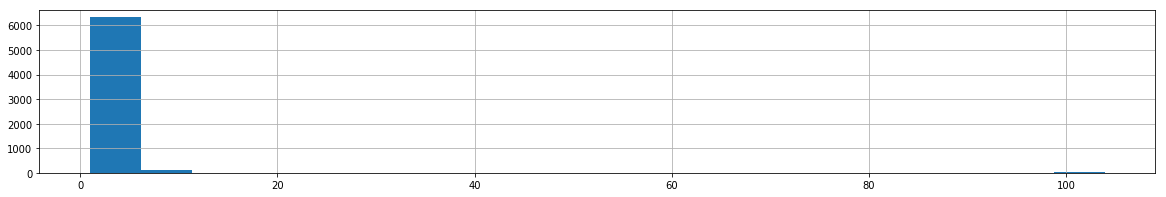

In [11]:
_=df.density.hist(figsize=(20,3),bins=20)

Cutting the histogram at 100g/cm3

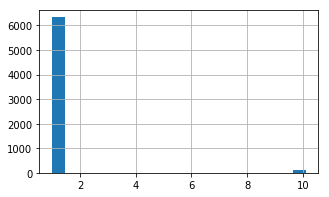

In [12]:
_=df[df.density<100].density.hist(figsize=(5,3),bins=20)

In [13]:
print(df[df.density>=100].shape[0],'records')

38 records


Cutting the histogram at 10g/cm3

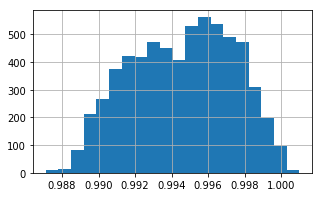

In [14]:
_=df[df.density<10].density.hist(figsize=(5,3),bins=20)

In [15]:
print(df[(df.density>=10)].shape[0]-df[(df.density>=100)].shape[0],'records')

98 records


So we removed

In [16]:
print(df[(df.density>=10)].shape[0],'records')

136 records


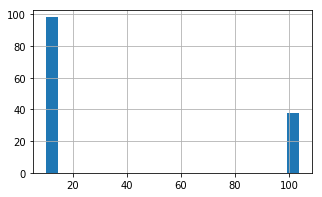

In [17]:
_=df[(df.density>=10)].density.hist(figsize=(5,3),bins=20)

In [18]:
df = df[df.density<10]

## Exploratory data analysis

Histogram of all numerical variables

In [19]:
numerical = [c for c in df.columns if c!='type']

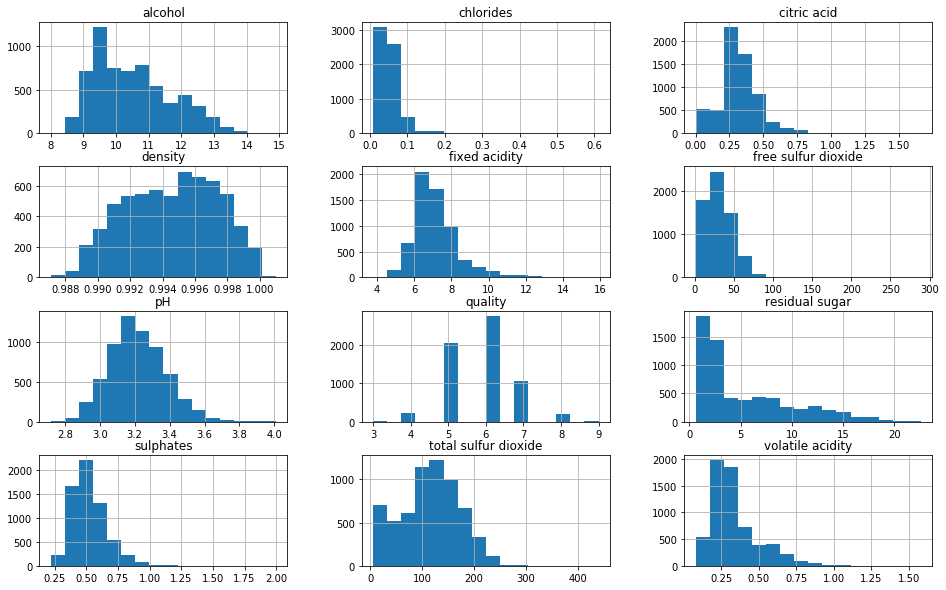

In [20]:
df[numerical].hist(figsize=(16,10),bins=16)
plt.show()

Correlation between the numerical variables

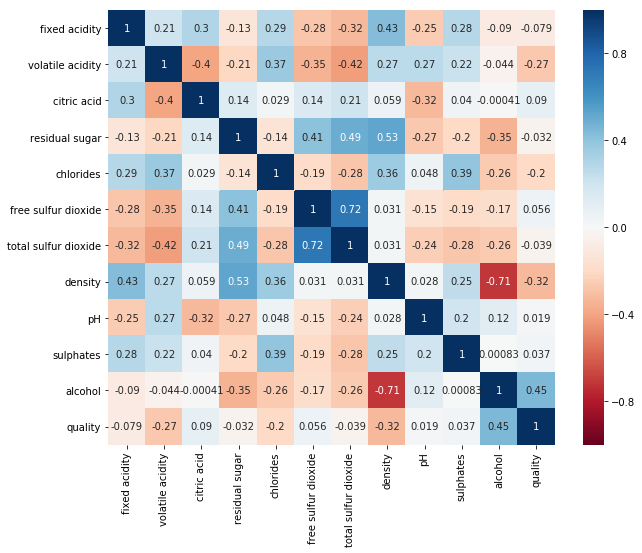

In [21]:
plt.subplots(figsize=(10, 8))
_=sns.heatmap(df.corr(), cmap="RdBu", vmin=-1, vmax=1, annot=True)

Variables 'free sulfur dioxide' and 'total sulfur dioxide' have high correlation, which indicates that we may not need both variables to construct our model

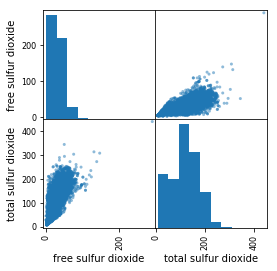

In [22]:
pd.plotting.scatter_matrix(df[['free sulfur dioxide','total sulfur dioxide']], figsize=(4,4))
plt.show()

Variables 'density' and 'alcohol' have high inverse correlation, and 'quality' is a lot more correlated to 'alcohol' than to all the other variables

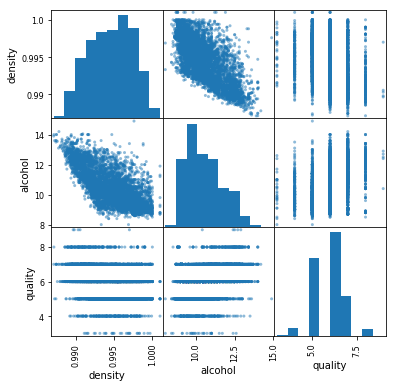

In [23]:
pd.plotting.scatter_matrix(df[['density','alcohol','quality']], figsize=(6,6))
plt.show()

Variable 'type' alone gives no indication about the quality

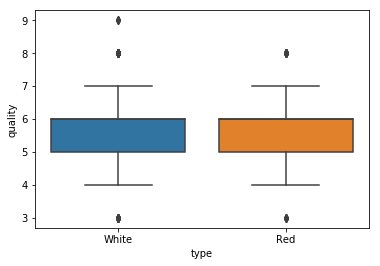

In [24]:
_=sns.boxplot(x='type', y='quality', data=df)

## Some preprocessing

Binarize 'type'

In [25]:
df.groupby('type').count().quality

type
Red      1528
White    4793
Name: quality, dtype: int64

In [26]:
df.loc[df.type=='Red','type'] = 0
df.loc[df.type=='White','type'] = 1

Split features variables and target

In [27]:
features = [c for c in df.columns if c!='quality']
X = df[features].values
y = df.quality.values

Split data into train/validation and test sets

In [28]:
test_size = 0.15

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=test_size)

In [29]:
print('dataset size:',X.shape[0])
print('train/validation set size:',X_train_val.shape[0])
print('test set size:',X_test.shape[0])

dataset size: 6321
train/validation set size: 5372
test set size: 949


## Principal component analyses

In [30]:
zscore = StandardScaler()
zscore.fit(X_train_val)
X_train_val_normalized = zscore.transform(X_train_val)

[0.31830964 0.52591718 0.65667976 0.7380061  0.7977956  0.84879832
 0.89418656 0.93661909 0.96637999 0.98825126 0.99830683 1.        ]


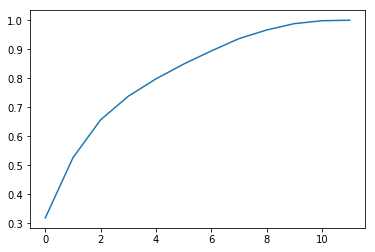

In [31]:
pca = PCA()
pca.fit(X_train_val_normalized)

print(pca.explained_variance_ratio_.cumsum())
plt.plot(pca.explained_variance_ratio_.cumsum())
plt.show()

It doesn't follow the Pareto principle, 80/20 rule, probably because the variables do not have a clear linear relationship.

## Cross-validation split into train and validation sets

In [32]:
n_splits = 10

kf = KFold(n_splits=n_splits)
kf_indexs = list(kf.split(X_train_val))

In [33]:
print('train sets size:',kf_indexs[0][0].size)
print('validation sets size:',kf_indexs[0][1].size)

train sets size: 4834
validation sets size: 538


## Decision tree regressor

The simpler the better, so we are going to start with a very simple model.

In [34]:
for max_depth in [3,10,15,20,None]:
    
    print('Decision tree regression with maximum depth', max_depth)

    regr = DecisionTreeRegressor(max_depth=max_depth)

    fold = 1
    mse_train = []
    mse_val = []

    for train_index, val_index in kf_indexs:

        # print('Fold',fold)
        fold += 1

        X_train, X_val = X_train_val[train_index], X_train_val[val_index]
        y_train, y_val = y_train_val[train_index], y_train_val[val_index]

        # Normalize data
        zscore = StandardScaler()
        zscore.fit(X_train)
        X_train = zscore.transform(X_train)
        X_val = zscore.transform(X_val)

        # Fit model
        regr = regr.fit(X_train, y_train)

        # Train prediciton for sanity check
        y_sanity = regr.predict(X_train)
        mse_train_fold = mean_squared_error(y_train,y_sanity)
        mse_train.append(mse_train_fold)
        # print('MSE train:',round(mse_train_fold,2))

        # Perform predicition
        y_pred = regr.predict(X_val)
        mse_val_fold = mean_squared_error(y_val,y_pred)
        mse_val.append(mse_val_fold)
        # print('MSE validation:',round(mse_val_fold,2),'\n')

    print('MSE train mean:',round(np.mean(mse_train),3))
    print('MSE train standard deviation:',round(np.std(mse_train),4))

    print('MSE validation mean:',round(np.mean(mse_val),3))
    print('MSE validation standard deviation:',round(np.std(mse_val),4),'\n')

Decision tree regression with maximum depth 3
MSE train mean: 0.556
MSE train standard deviation: 0.006
MSE validation mean: 0.571
MSE validation standard deviation: 0.0564 

Decision tree regression with maximum depth 10
MSE train mean: 0.259
MSE train standard deviation: 0.0052
MSE validation mean: 0.593
MSE validation standard deviation: 0.0534 

Decision tree regression with maximum depth 15
MSE train mean: 0.069
MSE train standard deviation: 0.0094
MSE validation mean: 0.69
MSE validation standard deviation: 0.0775 

Decision tree regression with maximum depth 20
MSE train mean: 0.009
MSE train standard deviation: 0.0048
MSE validation mean: 0.705
MSE validation standard deviation: 0.0668 

Decision tree regression with maximum depth None
MSE train mean: 0.0
MSE train standard deviation: 0.0
MSE validation mean: 0.701
MSE validation standard deviation: 0.0777 



The MSE in the validation set remains high, even at indefinite maximum depth.

## Random forest regressor

In [35]:
for n_estimators in [10,50,100,200]:
    
    for max_depth in [3,10,None]:

        print('Random forest regression containing', n_estimators,
              'estimators with maximum depth', max_depth)

        regr = RandomForestRegressor(n_estimators=n_estimators,
                                     max_depth=max_depth)

        fold = 1
        mse_train = []
        mse_val = []

        for train_index, val_index in kf_indexs:

            # print('Fold',fold)
            fold += 1

            X_train, X_val = X_train_val[train_index], X_train_val[val_index]
            y_train, y_val = y_train_val[train_index], y_train_val[val_index]

            # Normalize data
            zscore = StandardScaler()
            zscore.fit(X_train)
            X_train = zscore.transform(X_train)
            X_val = zscore.transform(X_val)

            # Fit model
            regr = regr.fit(X_train, y_train)

            # Train prediciton for sanity check
            y_sanity = regr.predict(X_train)
            mse_train_fold = mean_squared_error(y_train,y_sanity)
            mse_train.append(mse_train_fold)
            # print('MSE train:',round(mse_train_fold,2))

            # Perform predicition
            y_pred = regr.predict(X_val)
            mse_val_fold = mean_squared_error(y_val,y_pred)
            mse_val.append(mse_val_fold)
            # print('MSE validation:',round(mse_val_fold,2),'\n')

        print('MSE train mean:',round(np.mean(mse_train),3))
        print('MSE train standard deviation:',round(np.std(mse_train),4))

        print('MSE validation mean:',round(np.mean(mse_val),3))
        print('MSE validation standard deviation:',round(np.std(mse_val),4),'\n')

Random forest regression containing 10 estimators with maximum depth 3
MSE train mean: 0.538
MSE train standard deviation: 0.0068
MSE validation mean: 0.551
MSE validation standard deviation: 0.0569 

Random forest regression containing 10 estimators with maximum depth 10
MSE train mean: 0.234
MSE train standard deviation: 0.0087
MSE validation mean: 0.442
MSE validation standard deviation: 0.044 

Random forest regression containing 10 estimators with maximum depth None
MSE train mean: 0.074
MSE train standard deviation: 0.0019
MSE validation mean: 0.402
MSE validation standard deviation: 0.0411 

Random forest regression containing 50 estimators with maximum depth 3
MSE train mean: 0.536
MSE train standard deviation: 0.0061
MSE validation mean: 0.549
MSE validation standard deviation: 0.0566 

Random forest regression containing 50 estimators with maximum depth 10
MSE train mean: 0.219
MSE train standard deviation: 0.0055
MSE validation mean: 0.422
MSE validation standard deviation: 

As we increase the maximum depth and the number of estimators, the MSE decreases. But the decrease is quite small from 50 estimators to 100 or 200, so we are going to stop at 50 estimators.

## Final classifier

Construct the final classifier and evaluate it in the test set

In [36]:
regr = RandomForestRegressor(n_estimators=50, max_depth=None)

In [37]:
X_train = X_train_val
y_train = y_train_val

# Normalize data
zscore = StandardScaler()
zscore.fit(X_train)
X_train = zscore.transform(X_train)
X_test = zscore.transform(X_test)

# Fit model
regr = regr.fit(X_train, y_train)

# Train prediciton for sanity check
y_sanity = regr.predict(X_train)
mse_train = mean_squared_error(y_train,y_sanity)
print('MSE train:',round(mse_train,3))

# Perform predicition
y_pred = regr.predict(X_test)
mse_test = mean_squared_error(y_test,y_pred)
print('MSE test:',round(mse_test,3),'\n')

MSE train: 0.053
MSE test: 0.367 



Confusion matrix

In [38]:
cm = confusion_matrix(y_test, np.round(y_pred))
print(cm)

[[  0   1   3   1   0   0   0]
 [  0   3  21   6   0   0   0]
 [  0   0 210  75   3   0   0]
 [  0   1  58 331  31   0   0]
 [  0   0   2  77  89   0   0]
 [  0   0   0  11  16   8   0]
 [  0   0   0   1   1   0   0]]


In [39]:
total = np.sum(cm)

error0 = np.trace(cm)
print('Correct prediction:',round(100*error0/total,2),'%')

error1 = np.trace(cm[1:,:-1])+np.trace(cm[:-1,1:])
print('Error of one quality point:',round(100*error1/total,2),'%')

error2 = np.trace(cm[2:,:-2])+np.trace(cm[:-2,2:])
print('Error of two quality points:',round(100*error2/total,2),'%')

error3 = np.trace(cm[3:,:-3])+np.trace(cm[:-3,3:])
print('Error of three quality points:',round(100*error3/total,2),'%')

Correct prediction: 67.54 %
Error of one quality point: 29.4 %
Error of two quality points: 2.85 %
Error of three quality points: 0.21 %


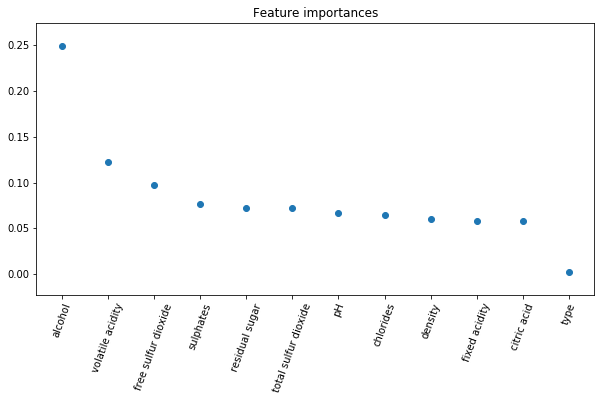

In [40]:
importances = regr.feature_importances_
indices = np.argsort(importances)[::-1]
labels = df.columns[indices]

plt.figure(figsize=(10,5))
plt.title("Feature importances")
plt.scatter(range(X_train_val.shape[1]), importances[indices])
plt.xticks(range(X_train_val.shape[1]), labels, rotation=70)
plt.show()